# Mushroom
# https://archive.ics.uci.edu/ml/datasets/Mushroom
- 8124 종류의 버섯의 특징과 독의 유무를 정리해논 데이터셋
- 버섯 모양의 특징을 기반으로 독의 유무를 판단

한 줄(row)이 버섯 한 종류.
1번쨰 컬럼은 독의 유무 : 독(p), 식용(e)   
2번쨰 컬럼은 버섯의 머리모양 : b(벨형태), c(원뿔), x(블록), f(평평), k(혹), s(오목)   
4번쨰 컬럼은 버섯의 머리 색 : n(갈색), b(황갈색), c(연한갈색), g(회색)    

* 자세한 내용은 위의 사이트에서 확인 

In [112]:
library(caret) #sample
library(nnet) #인공신경망 , 다항 로지스틱 회귀분석
library(e1071) # svm
library(randomForest) # randomForest
library(party) # 의사결정나무 ctree
library(ggplot2)


In [115]:
mush <-read.csv("../Data/mushroom.csv",header = F)
head(mush)
tail(mush)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23
p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23
8119,p,k,y,n,f,f,f,c,n,b,...,s,p,w,p,w,o,e,w,v,d
8120,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8121,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8122,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8123,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8124,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [118]:
str(mush)

'data.frame':	8124 obs. of  23 variables:
 $ V1 : Factor w/ 2 levels "e","p": 2 1 1 2 1 1 1 1 2 1 ...
 $ V2 : Factor w/ 6 levels "b","c","f","k",..: 6 6 1 6 6 6 1 1 6 1 ...
 $ V3 : Factor w/ 4 levels "f","g","s","y": 3 3 3 4 3 4 3 4 4 3 ...
 $ V4 : Factor w/ 10 levels "b","c","e","g",..: 5 10 9 9 4 10 9 9 9 10 ...
 $ V5 : Factor w/ 2 levels "f","t": 2 2 2 2 1 2 2 2 2 2 ...
 $ V6 : Factor w/ 9 levels "a","c","f","l",..: 7 1 4 7 6 1 1 4 7 1 ...
 $ V7 : Factor w/ 2 levels "a","f": 2 2 2 2 2 2 2 2 2 2 ...
 $ V8 : Factor w/ 2 levels "c","w": 1 1 1 1 2 1 1 1 1 1 ...
 $ V9 : Factor w/ 2 levels "b","n": 2 1 1 2 1 1 1 1 2 1 ...
 $ V10: Factor w/ 12 levels "b","e","g","h",..: 5 5 6 6 5 6 3 6 8 3 ...
 $ V11: Factor w/ 2 levels "e","t": 1 1 1 1 2 1 1 1 1 1 ...
 $ V12: Factor w/ 5 levels "?","b","c","e",..: 4 3 3 4 4 3 3 3 4 3 ...
 $ V13: Factor w/ 4 levels "f","k","s","y": 3 3 3 3 3 3 3 3 3 3 ...
 $ V14: Factor w/ 4 levels "f","k","s","y": 3 3 3 3 3 3 3 3 3 3 ...
 $ V15: Factor w/ 9 levels "b","c"

In [119]:
#인공신경망,의사결정나무, RandomForest, SVM, 로지스틱 회귀분석으로 예측력 구하기

In [120]:
summary(mush)

 V1       V2       V3             V4       V5             V6       V7      
 e:4208   b: 452   f:2320   n      :2284   f:4748   n      :3528   a: 210  
 p:3916   c:   4   g:   4   g      :1840   t:3376   f      :2160   f:7914  
          f:3152   s:2556   e      :1500            s      : 576           
          k: 828   y:3244   y      :1072            y      : 576           
          s:  32            w      :1040            a      : 400           
          x:3656            b      : 168            l      : 400           
                            (Other): 220            (Other): 484           
 V8       V9            V10       V11      V12      V13      V14     
 c:6812   b:5612   b      :1728   e:3516   ?:2480   f: 552   f: 600  
 w:1312   n:2512   p      :1492   t:4608   b:3776   k:2372   k:2304  
                   w      :1202            c: 556   s:5176   s:4936  
                   n      :1048            e:1120   y:  24   y: 284  
                   g      : 752           

In [121]:
sum(is.na(mush))

[1] 0

In [122]:
mush <-mush[,-17]

In [123]:
str(mush)

'data.frame':	8124 obs. of  22 variables:
 $ V1 : Factor w/ 2 levels "e","p": 2 1 1 2 1 1 1 1 2 1 ...
 $ V2 : Factor w/ 6 levels "b","c","f","k",..: 6 6 1 6 6 6 1 1 6 1 ...
 $ V3 : Factor w/ 4 levels "f","g","s","y": 3 3 3 4 3 4 3 4 4 3 ...
 $ V4 : Factor w/ 10 levels "b","c","e","g",..: 5 10 9 9 4 10 9 9 9 10 ...
 $ V5 : Factor w/ 2 levels "f","t": 2 2 2 2 1 2 2 2 2 2 ...
 $ V6 : Factor w/ 9 levels "a","c","f","l",..: 7 1 4 7 6 1 1 4 7 1 ...
 $ V7 : Factor w/ 2 levels "a","f": 2 2 2 2 2 2 2 2 2 2 ...
 $ V8 : Factor w/ 2 levels "c","w": 1 1 1 1 2 1 1 1 1 1 ...
 $ V9 : Factor w/ 2 levels "b","n": 2 1 1 2 1 1 1 1 2 1 ...
 $ V10: Factor w/ 12 levels "b","e","g","h",..: 5 5 6 6 5 6 3 6 8 3 ...
 $ V11: Factor w/ 2 levels "e","t": 1 1 1 1 2 1 1 1 1 1 ...
 $ V12: Factor w/ 5 levels "?","b","c","e",..: 4 3 3 4 4 3 3 3 4 3 ...
 $ V13: Factor w/ 4 levels "f","k","s","y": 3 3 3 3 3 3 3 3 3 3 ...
 $ V14: Factor w/ 4 levels "f","k","s","y": 3 3 3 3 3 3 3 3 3 3 ...
 $ V15: Factor w/ 9 levels "b","c"

In [124]:
mush <- mush[ ,-12]

In [125]:
str(mush)

'data.frame':	8124 obs. of  21 variables:
 $ V1 : Factor w/ 2 levels "e","p": 2 1 1 2 1 1 1 1 2 1 ...
 $ V2 : Factor w/ 6 levels "b","c","f","k",..: 6 6 1 6 6 6 1 1 6 1 ...
 $ V3 : Factor w/ 4 levels "f","g","s","y": 3 3 3 4 3 4 3 4 4 3 ...
 $ V4 : Factor w/ 10 levels "b","c","e","g",..: 5 10 9 9 4 10 9 9 9 10 ...
 $ V5 : Factor w/ 2 levels "f","t": 2 2 2 2 1 2 2 2 2 2 ...
 $ V6 : Factor w/ 9 levels "a","c","f","l",..: 7 1 4 7 6 1 1 4 7 1 ...
 $ V7 : Factor w/ 2 levels "a","f": 2 2 2 2 2 2 2 2 2 2 ...
 $ V8 : Factor w/ 2 levels "c","w": 1 1 1 1 2 1 1 1 1 1 ...
 $ V9 : Factor w/ 2 levels "b","n": 2 1 1 2 1 1 1 1 2 1 ...
 $ V10: Factor w/ 12 levels "b","e","g","h",..: 5 5 6 6 5 6 3 6 8 3 ...
 $ V11: Factor w/ 2 levels "e","t": 1 1 1 1 2 1 1 1 1 1 ...
 $ V13: Factor w/ 4 levels "f","k","s","y": 3 3 3 3 3 3 3 3 3 3 ...
 $ V14: Factor w/ 4 levels "f","k","s","y": 3 3 3 3 3 3 3 3 3 3 ...
 $ V15: Factor w/ 9 levels "b","c","e","g",..: 8 8 8 8 8 8 8 8 8 8 ...
 $ V16: Factor w/ 9 levels "b","c"

In [70]:
#model <- lm(V1 ~ . , data = mush.num)

Warning message:
“Using size for a discrete variable is not advised.”

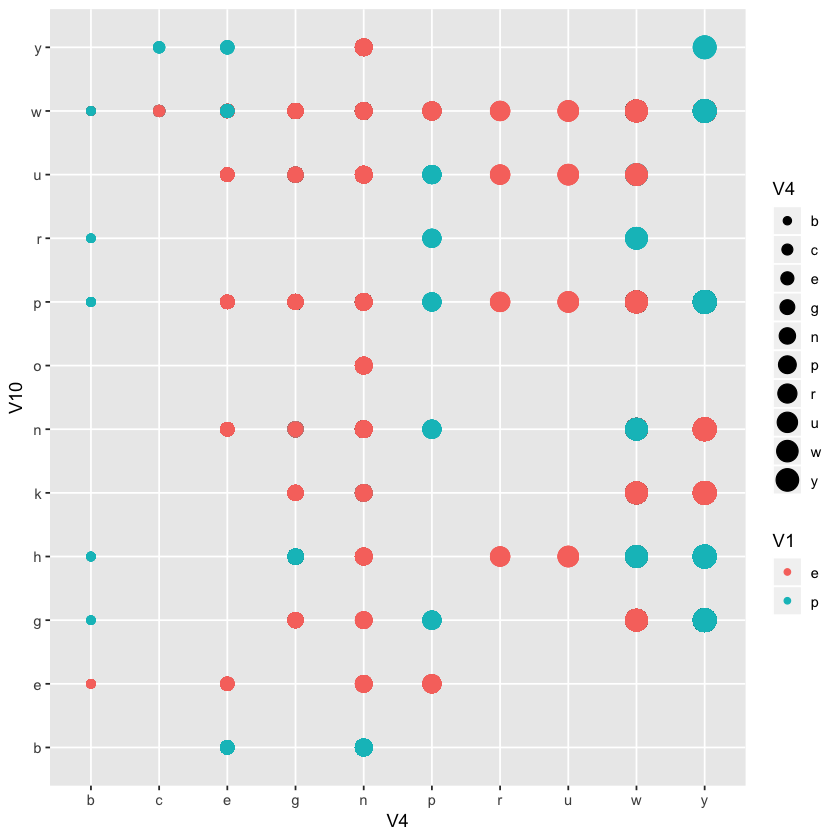

In [114]:


qplot(V4,V10 ,data = mush, col = V1 , size = V4)

In [99]:
model


Call:
lm(formula = V1 ~ ., data = mush.num)

Coefficients:
(Intercept)           V2           V3           V4           V5           V6  
   1.894596    -0.001782     0.023349    -0.001350    -0.348543    -0.022486  
         V7           V8           V9          V10          V11          V12  
  -0.068924    -0.474142     0.539086    -0.010069    -0.052575    -0.071722  
        V13          V14          V15          V16          V18          V19  
  -0.161188    -0.057135    -0.010981    -0.006322     0.400785     0.038662  
        V20          V21          V22          V23  
   0.017830    -0.048491    -0.009910     0.016822  


In [100]:
#summary(model)

In [101]:
#reduced <- step(model, direction = "backward" )

In [102]:
# 샘플나누기

sampling <- function(){
samp <<- createDataPartition(mush$V1 , p = 0.7,list = F)
data.tr <<- mush[samp,]
data.test <<- mush[-samp,]

x <<- subset(data.test, select = -V1)
y <<- data.test$V1

}    



In [103]:
sampling()

In [104]:
#인공신경망 테스트
ANN <- function(data.tr , data.test , x , y ){
    model.nnet <- nnet(V1 ~. , data = data.tr , size = 3)
    pred <- predict(model.nnet , x , type = "class")
    cat("예측력" ,mean(pred == y), "입니다.")
    table(pred,y)
    return(mean(pred == y))
}

In [105]:
#의사결정 나무 
CTREE <-function(data.tr , data.test , x , y ){
    model.ctree <- ctree(V1 ~ . , data=data.tr)
    pred <- predict(model.ctree , x )
    cat("예측력" ,mean(pred == y), "입니다.")
    table(pred,y)
    return(mean(pred == y))
}

In [106]:
#RandomForesst
RandomForest<-function(data.tr , data.test , x , y ){
    model.rf <- randomForest(V1 ~ . , data=data.tr, ntree = 100)
    pred <- predict(model.rf , x )
    cat("예측력" ,mean(pred == y), "입니다.")
    table(pred,y)
    return(mean(pred == y))
} 

In [107]:
#SVM
SVM <-function(data.tr , data.test , x , y ){
    model.svm <- svm(V1 ~ . , data=data.tr)
    pred <- predict(model.svm , x )
    cat("예측력" ,mean(pred == y), "입니다.")
    table(pred,y)
    return(mean(pred == y))
} 

In [108]:
#Logistic regression
Logisticreg <-function(data.tr , data.test , x , y ){
    model.log <- multinom(V1 ~ . , data=data.tr)
    pred <- predict(model.log , x )
    cat("예측력" ,mean(pred == y), "입니다.")
    table(pred,y)
    return(mean(pred == y))
} 

In [109]:
a <- rep(0,5)
iteration <- 5
for(i in 1:iteration){
    
    a = a + c(
            ANN(data.tr , data.test , x , y ),
            CTREE(data.tr , data.test , x , y ),
            RandomForest(data.tr , data.test , x , y ),
            SVM(data.tr , data.test , x , y ),
            Logisticreg(data.tr , data.test , x , y )
    )
    
}
a<- a/iteration

result<-data.frame(예측력 = a)
rownames(result) = c("인공신경망","의사결정나무","RandomForest","SVM","로지스틱회귀분석")
result

# weights:  265
initial  value 3979.459846 
iter  10 value 45.108563
iter  20 value 1.259989
iter  30 value 0.030891
iter  40 value 0.001779
iter  50 value 0.000567
iter  60 value 0.000294
final  value 0.000082 
converged
예측력 1 입니다.예측력 0.9987685 입니다.예측력 1 입니다.예측력 0.9967159 입니다.# weights:  88 (87 variable)
initial  value 3942.621163 
iter  10 value 57.668987
iter  20 value 3.943178
iter  30 value 1.225303
iter  40 value 0.141278
iter  50 value 0.031601
iter  60 value 0.003022
iter  70 value 0.000209
final  value 0.000065 
converged
예측력 0.999179 입니다.# weights:  265
initial  value 4097.202040 
iter  10 value 197.239881
iter  20 value 24.631579
iter  30 value 23.193106
iter  40 value 21.960132
iter  50 value 21.508628
iter  60 value 21.260224
iter  70 value 18.320713
iter  80 value 12.485362
iter  90 value 0.390306
iter 100 value 0.008864
final  value 0.008864 
stopped after 100 iterations
예측력 1 입니다.예측력 0.9987685 입니다.예측력 1 입니다.예측력 0.9967159 입니다.# weights:  88 (87 variable)
initial  value 3

,예측력
인공신경망,1.0000000
의사결정나무,0.9987685
RandomForest,1.0000000
SVM,0.9967159
로지스틱회귀분석,0.9991790


In [110]:

result

,예측력
인공신경망,1.0000000
의사결정나무,0.9987685
RandomForest,1.0000000
SVM,0.9967159
로지스틱회귀분석,0.9991790
